TASK 1

Plot the populations for the years in the period. Add legend and axis labels to the plot.

<IPython.core.display.Javascript object>


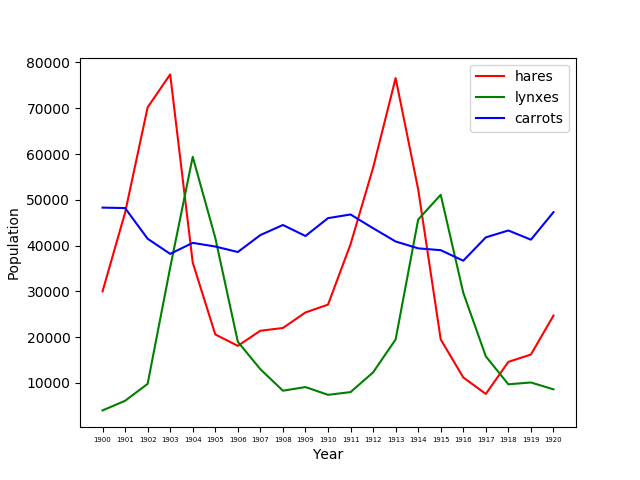

In [69]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")
years = data[:, 0]
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(0, 21), years.astype(int))
plt.plot(data[:,1], label = "hares", color='r')
plt.plot(data[:, 2], label = "lynxes", color='g')
plt.plot(data[:, 3], label = "carrots", color='b')
plt.legend()
plt.show()
#x_values

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

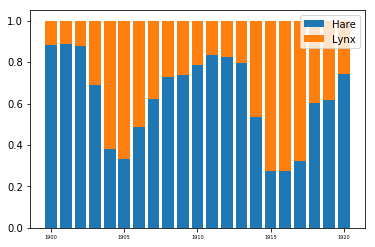

In [61]:
import matplotlib.pyplot as plt
import numpy as np
total = data[:, 1:3].sum(axis=1) # количество всех животных каждый год
years = data[:, 0]
plt.bar(years, data[:, 1]/total, label = "Hare")
plt.bar(years, data[:, 2]/total, label = "Lynx", bottom=data[:, 1]/total) 
#plt.bar(years, data[:, 3]/total, label = "Carrots", bottom=data[:, 1]/total + data[:, 2]/total)
plt.legend()
plt.show()
#total

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

<IPython.core.display.Javascript object>


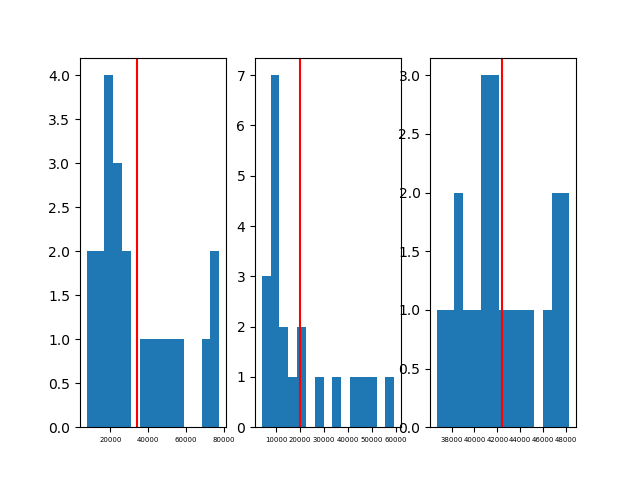

In [63]:
%matplotlib notebook

fig, ax = plt.subplots(1, 3) #в ах массив из трех осей, в каждой оси своя гистограмма
ax[0].hist(data[:, 1], bins = 15)
ax[0].axvline(data[:,1].mean(), c="r")

ax[1].hist(data[:, 2], bins = 15)
ax[1].axvline(data[:,2].mean(), c="r")

ax[2].hist(data[:, 3], bins = 15)
ax[2].axvline(data[:,3].mean(), c="r")

plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

<IPython.core.display.Javascript object>


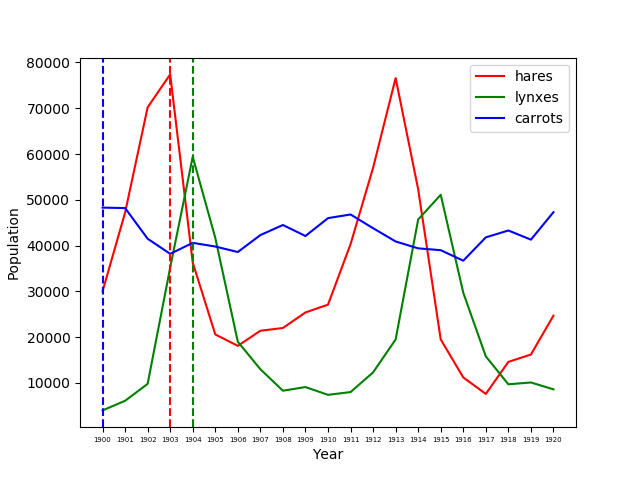

In [82]:
import matplotlib.pyplot as plt
import numpy as np

max_years = data[np.argmax(data, axis=0), 0]
#max_years
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(0, 21), years.astype(int))
plt.plot(data[:,1], label = "hares", color='r')
plt.plot(data[:, 2], label = "lynxes", color='g')
plt.plot(data[:, 3], label = "carrots", color='b')
plt.axvline(x=max_years[1] % 1900, color='r', linestyle="dashed")
plt.axvline(x=max_years[2] % 1900, color='g', linestyle="dashed")
plt.axvline(x=max_years[3] % 1900, color='b', linestyle="dashed")
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

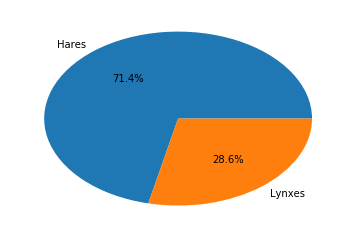

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def int_to_num(a):
    if a == 0:
        return 'H'
    else:
        return 'L'

data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")
largest_pop_int = np.argmax(data[:, 1:3], axis=1)
largest_pop = list(map(int_to_num,largest_pop_int))
#largest_pop
labels = "Hares", "Lynxes"
sizes = [215, 130, 245, 210]
num = [largest_pop.count('H'), largest_pop.count('L')]
plt.pie(num,labels = labels, autopct='%1.1f%%')
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

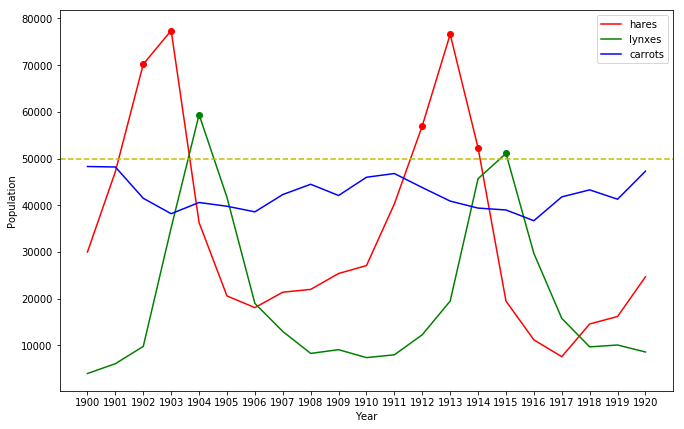

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(11, 7))
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(0, 21), years.astype(int))
plt.plot(data[:,1], label = "hares", color='r')
plt.plot(data[:, 2], label = "lynxes", color='g')
plt.plot(data[:, 3], label = "carrots", color='b')
plt.axhline(y=50000, color='y', linestyle="dashed")
plt.scatter(years[data[:, 1] > 50000] % 1900, data[:, 1] [data[:, 1] > 50000], color='r')
plt.scatter(years[data[:, 2] > 50000] % 1900, data[:, 2] [data[:, 2] > 50000], color='g')
plt.scatter(years[data[:, 3] > 50000] % 1900, data[:, 3] [data[:, 3] > 50000], color='b')
plt.legend()
plt.show()



Find the top 2 years for each species when they had the lowest populations.

In [40]:
import numpy as np

populations = data[:, 1:]
lower_2 = populations.argsort(axis=0)[:2]
years[lower_2]

array([[1917., 1900., 1916.],
       [1916., 1901., 1903.]])

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

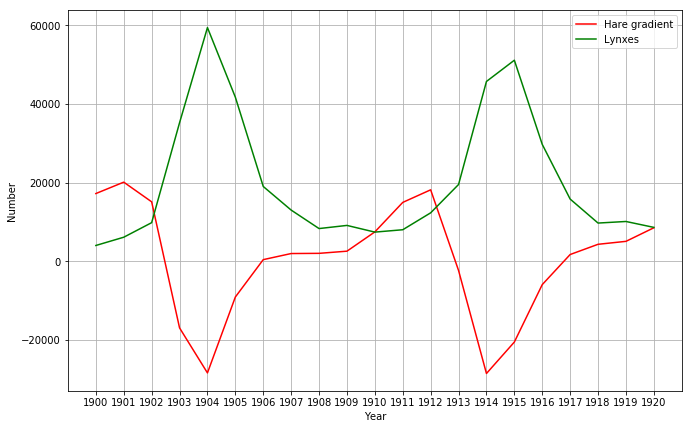

-0.9179248480315341

In [53]:
import matplotlib.pyplot as plt
import numpy as np

change_H = np.gradient(data[:, 1])
plt.figure(figsize=(11, 7))
plt.xlabel('Year')
plt.ylabel('Number')
plt.grid()
plt.xticks(range(0, 21), years.astype(int))
plt.plot(years%1900, change_H, label='Hare gradient', color='r')
plt.plot(data[:, 2], label = "Lynxes", color='g')
plt.legend()
plt.show()

np.corrcoef(change_H, lynxes)[0, 1]

Show population of hares vs carrots and hares vs lynxes.

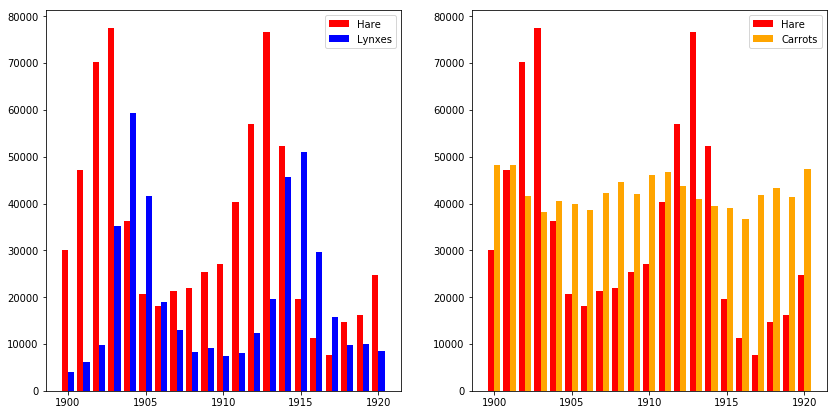

In [69]:
width=0.4
fig, ax = plt.subplots(1, 2, figsize = (14, 7))

ax[0].bar(years - width/2, data[:, 1], width, color='r', label='Hare')
ax[0].bar(years + width/2, data[:, 2], width, color='b', label='Lynxes')
ax[0].legend()

ax[1].bar(years - width/2, data[:, 1], width, color='r', label='Hare')
ax[1].bar(years + width/2, data[:, 3], width, color='orange', label='Carrots')
ax[1].legend()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

TASK 2

Plot a graph of total explained variance vs number of principal components.

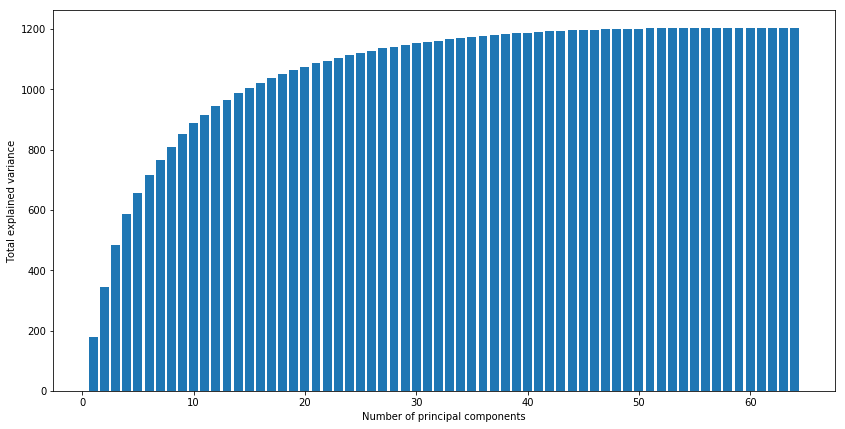

In [9]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


digits = load_digits()
pca_arr = [PCA(n_components = i) for i in range (1, 65)] #массив из "функций"!!!
X_arr = [pca_arr[i].fit_transform(digits.data.astype(float)) for i in range(64)]
total_expl_var = [np.sum(pca_arr[i].explained_variance_) for i in range(64)]

#plot a graph
plt.figure(figsize=(14, 7))
plt.xlabel('Number of principal components')
plt.ylabel('Total explained variance')
plt.bar(np.arange(1, 65), total_expl_var)
plt.show()

TASK 3

Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [26]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

expl_var = total_expl_var[-1]
num_99 = np.nonzero(total_expl_var > expl_var * 0.99)[0][0]
num_95 = np.nonzero(total_expl_var > expl_var * 0.95)[0][0]
num_90 = np.nonzero(total_expl_var > expl_var * 0.90)[0][0]
num_85 = np.nonzero(total_expl_var > expl_var * 0.85)[0][0]
num_99, num_95, num_90, num_85

(40, 28, 20, 16)

TASK 4

Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

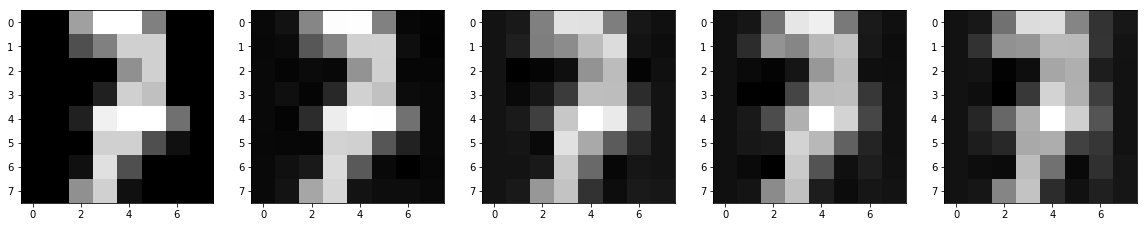

In [31]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
images = digits.data.reshape(-1, 8, 8)
i = 837
pca_arr = [PCA(n_components = i) for i in (num_99, num_95, num_90, num_85)]
X_arr = [pca_arr[i].fit_transform(digits.data.astype(float)) for i in range(4)]
X_arr_restored = [pca_arr[i].inverse_transform(X_arr[i]) for i in range(4)]
#pca.inverse_transform(X_transformed)

fig, ax = plt.subplots(1, 5, figsize = (20, 4))
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(X_arr_restored[0][i].reshape(8, 8), cmap='gray')
ax[2].imshow(X_arr_restored[1][i].reshape(8, 8), cmap='gray')
ax[3].imshow(X_arr_restored[2][i].reshape(8, 8), cmap='gray')
ax[4].imshow(X_arr_restored[3][i].reshape(8, 8), cmap='gray')
plt.show()
